In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import rarfile
import os
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Reading the data

In [2]:
data = pd.read_csv("D:\Programming\ML\ML\Hashem_Essam_Course\DNN\Airline_Delay_Cause.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17532\3393397410.py:1: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv("D:\Programming\ML\ML\Hashem_Essam_Course\DNN\Airline_Delay_Cause.csv")


In [3]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [5]:
data["airport_name"].value_counts()

airport_name
Detroit, MI: Detroit Metro Wayne County              3022
Los Angeles, CA: Los Angeles International           2990
Las Vegas, NV: McCarran International                2978
Kansas City, MO: Kansas City International           2967
Pittsburgh, PA: Pittsburgh International             2951
                                                     ... 
Tokeen, AK: Tokeen Airport                              1
Wendover, UT: Wendover Airport                          1
Spokane, WA: Fairchild AFB                              1
Columbus, MS: Columbus AFB                              1
Youngstown/Warren, OH: Youngstown-Warren Regional       1
Name: count, Length: 420, dtype: int64

In [6]:
data["carrier"].value_counts()

carrier
OO    38145
DL    27581
EV    26671
MQ    24402
AA    19781
UA    19131
WN    17576
YV    14528
AS    12942
F9    12306
OH    11999
9E    11998
B6    11585
US    10698
NW     8080
XE     7375
FL     6956
CO     6917
G4     6432
YX     4449
RU     4136
NK     3797
HA     3580
DH     1924
HP     1581
VX     1428
TZ      924
QX      838
AQ      253
Name: count, dtype: int64

In [7]:
data["airport"].value_counts()

airport
DTW    3022
LAX    2990
LAS    2978
MCI    2967
PIT    2950
       ... 
TKI       1
ENV       1
SKA       1
CBM       1
YNG       1
Name: count, Length: 420, dtype: int64

Dealing with object data

In [8]:
data["carrier_ct"]

0           5.95
1           7.38
2           0.13
3           7.26
4          13.84
           ...  
318012     25.69
318013     21.78
318014      6.99
318015      3.66
318016    121.15
Name: carrier_ct, Length: 318017, dtype: float64

In [9]:
data = data.drop(['carrier','carrier_name','airport','airport_name'],axis=1)
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [10]:
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317268 entries, 0 to 318016
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317268 non-null  int64  
 1   month                317268 non-null  int64  
 2   arr_flights          317268 non-null  float64
 3   arr_del15            317268 non-null  float64
 4   carrier_ct           317268 non-null  float64
 5   weather_ct           317268 non-null  float64
 6   nas_ct               317268 non-null  float64
 7   security_ct          317268 non-null  float64
 8   late_aircraft_ct     317268 non-null  float64
 9   arr_cancelled        317268 non-null  float64
 10  arr_diverted         317268 non-null  float64
 11  arr_delay            317268 non-null  float64
 12  carrier_delay        317268 non-null  float64
 13  weather_delay        317268 non-null  float64
 14  nas_delay            317268 non-null  float64
 15  security_delay       3

Creating the target column

In [12]:
data["weather_delay"].value_counts()

weather_delay
0.0       126328
15.0        1749
16.0        1547
20.0        1479
7.0         1451
           ...  
4278.0         1
4716.0         1
2710.0         1
9971.0         1
2563.0         1
Name: count, Length: 5388, dtype: int64

In [13]:
data['weather_delay'].min(),data['weather_delay'].max()
wd = data["weather_delay"].mean()
wd

220.73719694390863

In [14]:
data['WDCase'] = data['weather_delay'].apply(lambda x : 1 if x >220 else 0)

In [15]:
data['WDCase'].value_counts()

WDCase
0    253619
1     63649
Name: count, dtype: int64

In [16]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


Feature engineering

In [17]:
data["month"].value_counts()

month
1     26852
12    26739
9     26630
8     26572
4     26519
3     26491
11    26371
2     26324
6     26268
10    26251
5     26202
7     26049
Name: count, dtype: int64

In [18]:
data["arr_delay"].value_counts()

arr_delay
0.0         8909
15.0         436
17.0         362
16.0         355
18.0         330
            ... 
43625.0        1
46880.0        1
49861.0        1
100895.0       1
12171.0        1
Name: count, Length: 28025, dtype: int64

In [19]:
data["arr_delay"].min(),data["arr_delay"].max()

(0.0, 433687.0)

In [20]:
data["arr_delay"].mean()

4213.2662796121895

In [21]:
data["arr_delay"] = [index/(60) for index in data["arr_delay"]]
data["arr_delay"].max()

7228.116666666667

In [22]:
data["arr_del15"].value_counts()

arr_del15
0.0       8909
1.0       8838
4.0       8727
5.0       8634
2.0       8602
          ... 
2284.0       1
3292.0       1
2028.0       1
1479.0       1
2660.0       1
Name: count, Length: 2315, dtype: int64

In [23]:
data["weather_ct"].value_counts()

weather_ct
0.00     126354
1.00      16471
2.00       4465
3.00       1930
4.00        990
          ...  
35.20         1
70.92         1
77.70         1
33.95         1
81.77         1
Name: count, Length: 5575, dtype: int64

In [24]:
data["nas_ct"].value_counts()

nas_ct
0.00      29805
1.00       8907
2.00       3911
3.00       2177
4.00       1385
          ...  
382.39        1
179.40        1
149.61        1
155.60        1
221.91        1
Name: count, Length: 21031, dtype: int64

Data Visualization

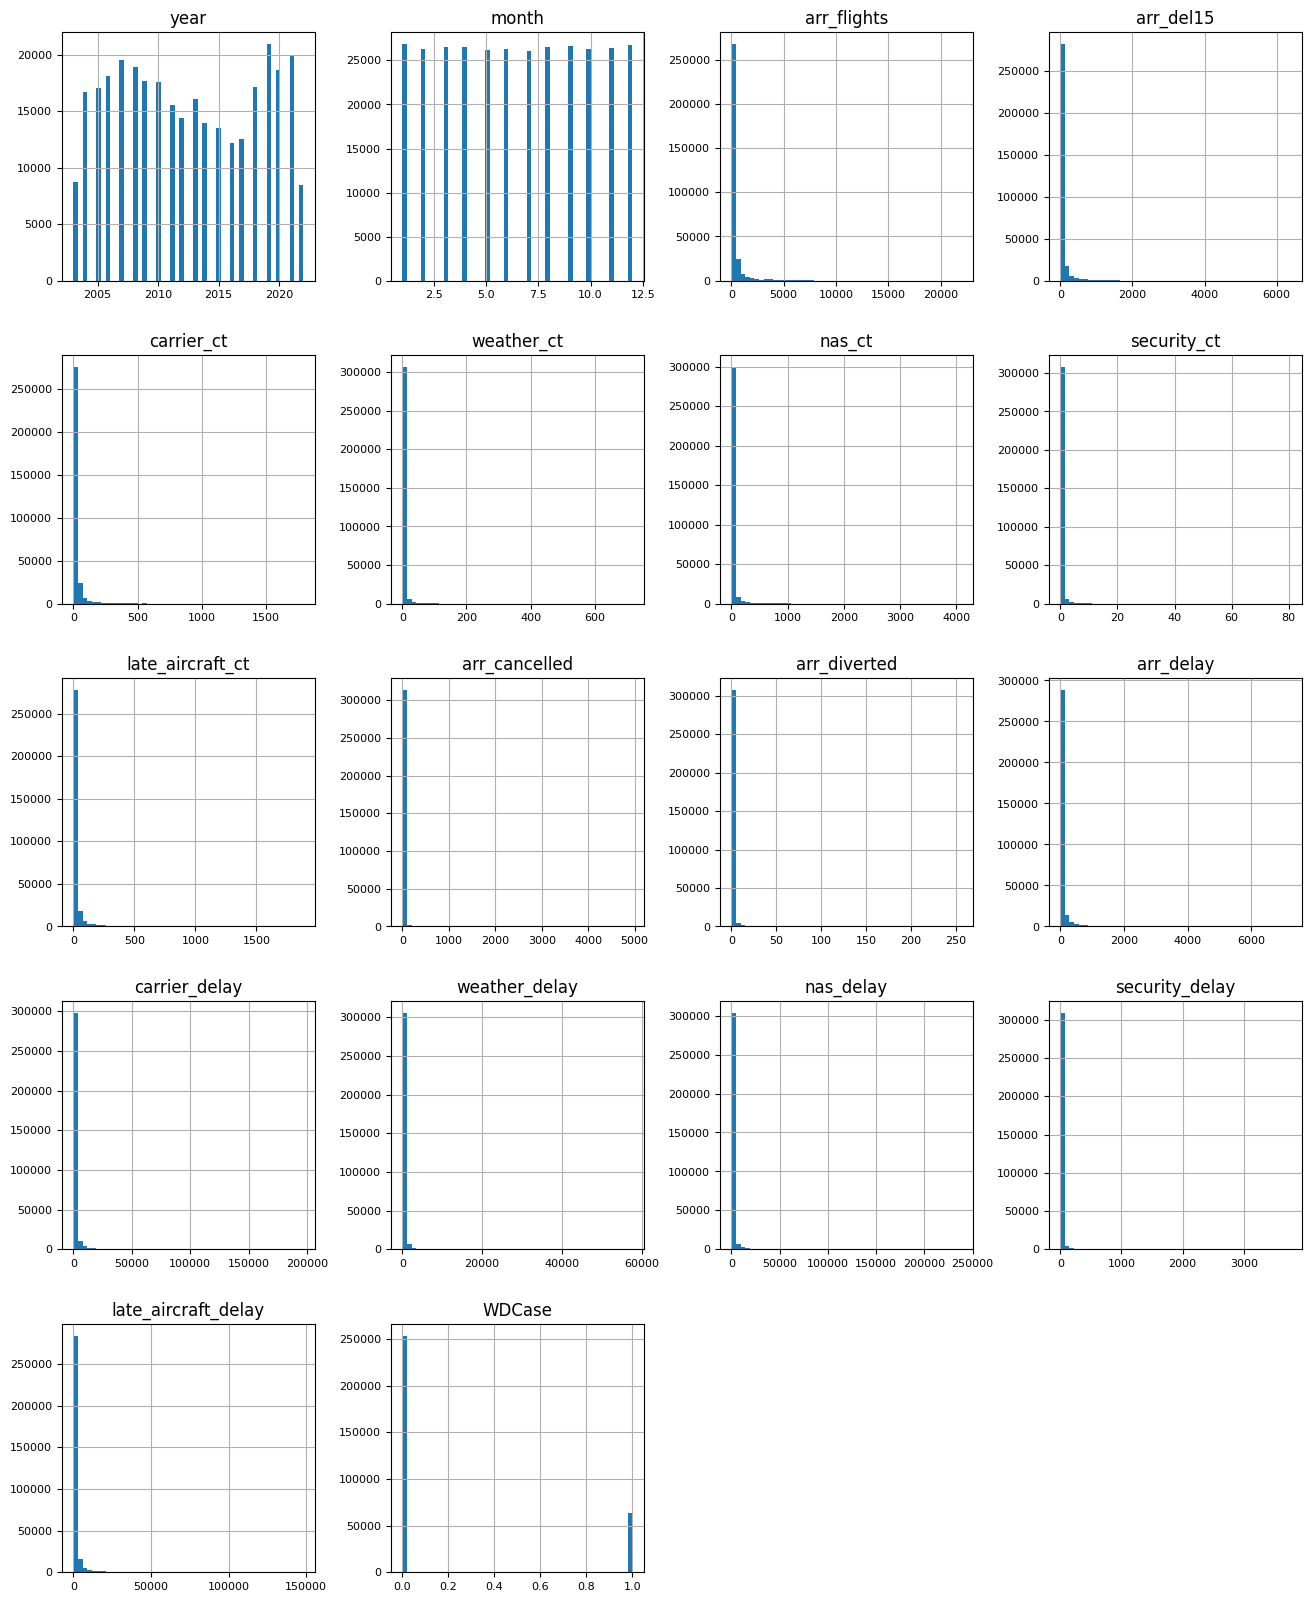

In [25]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

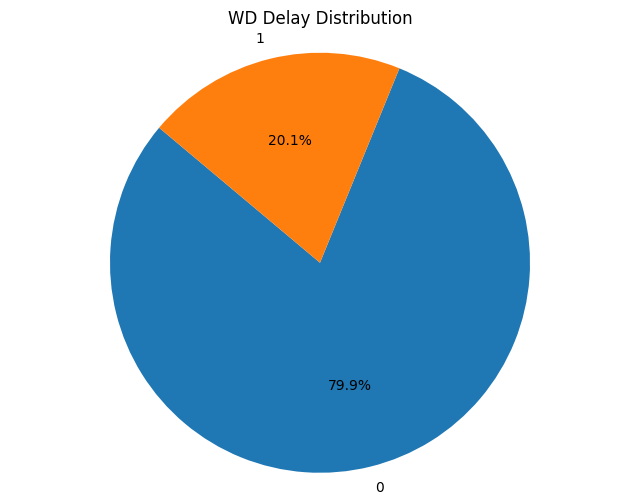

In [26]:
# Calculate the counts for each delay type
wd_delay_counts = data["WDCase"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(wd_delay_counts, labels=wd_delay_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('WD Delay Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

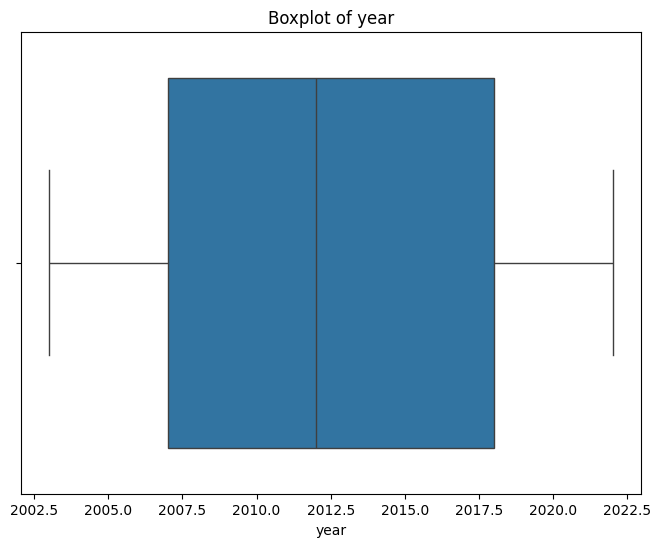

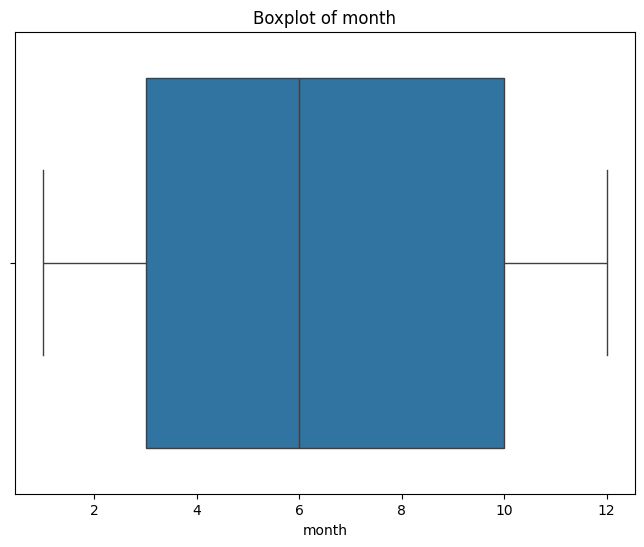

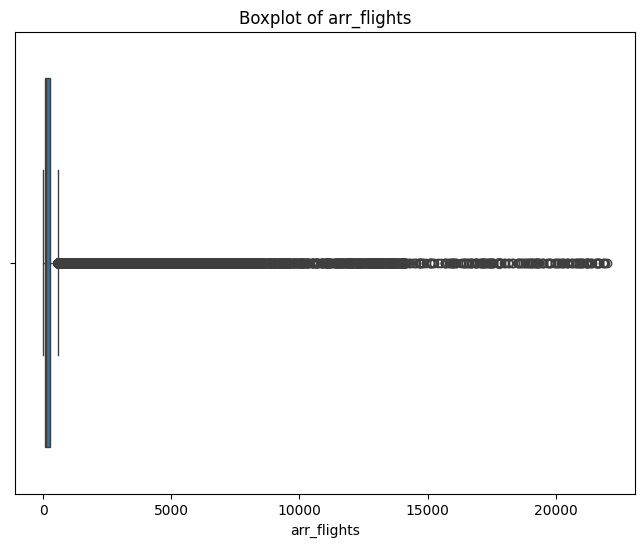

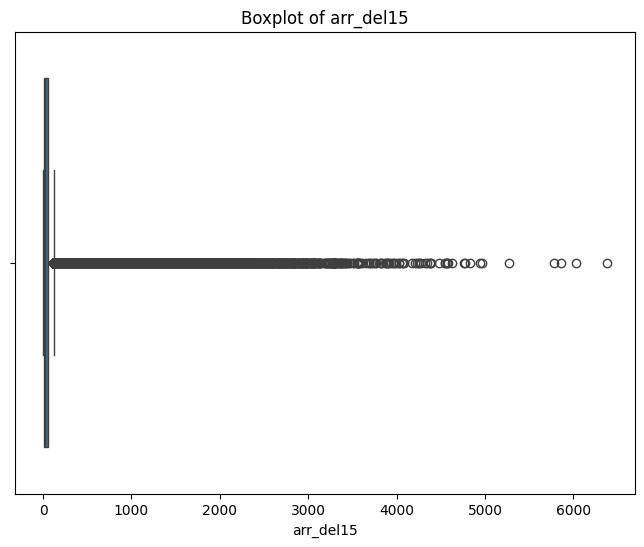

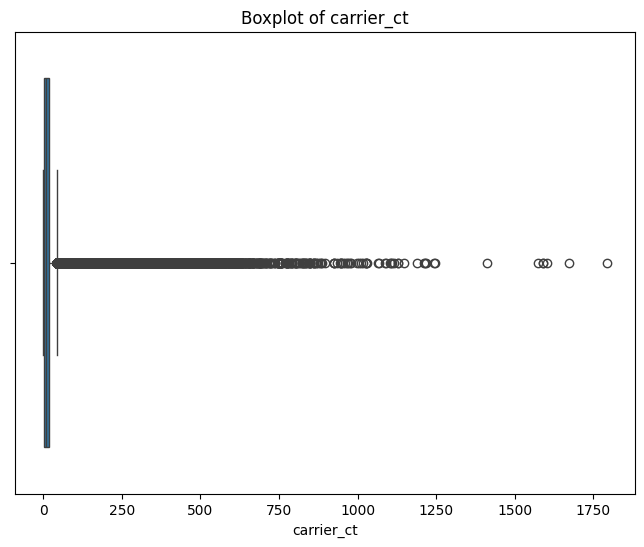

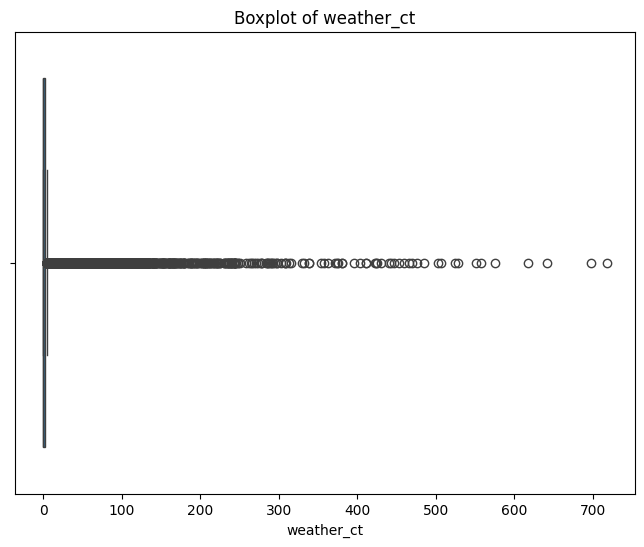

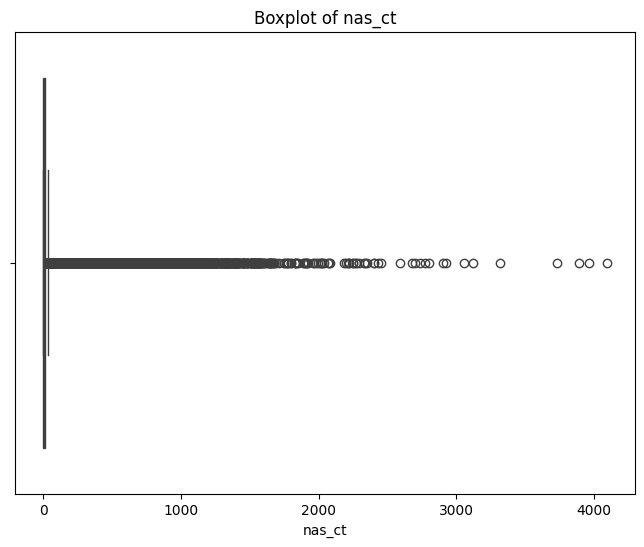

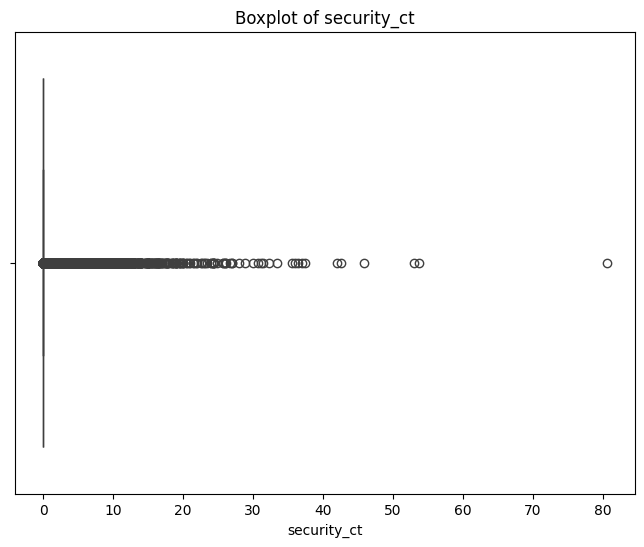

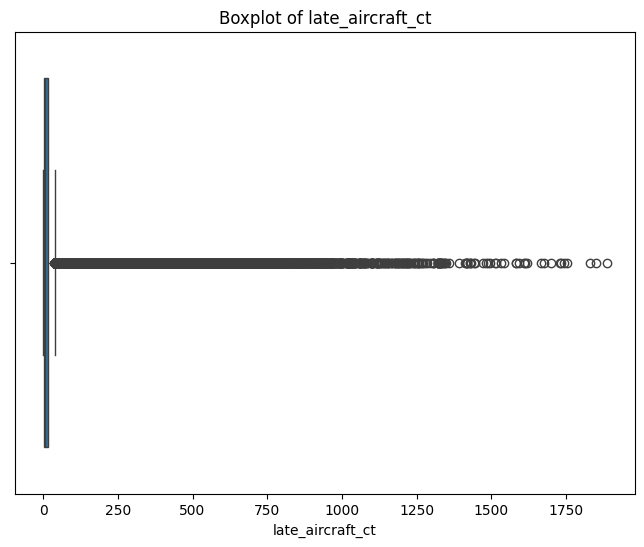

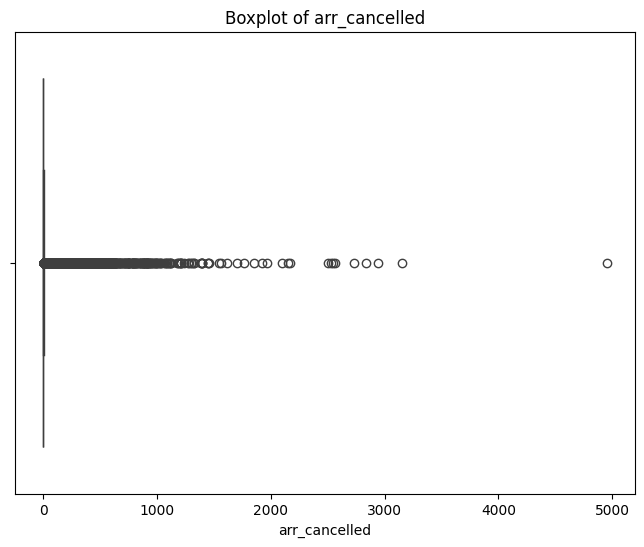

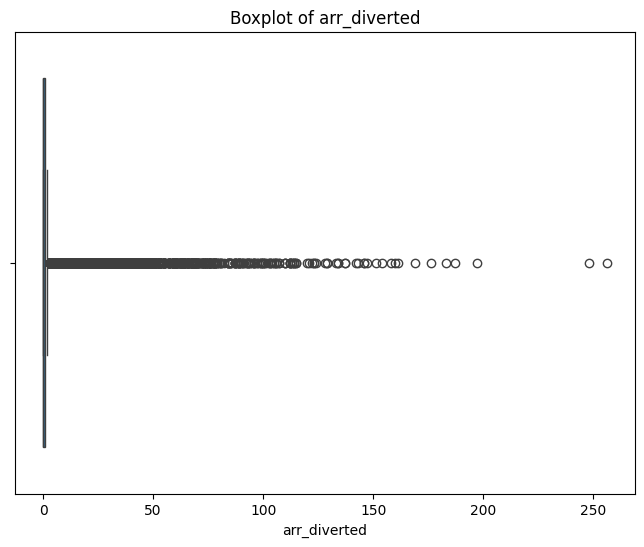

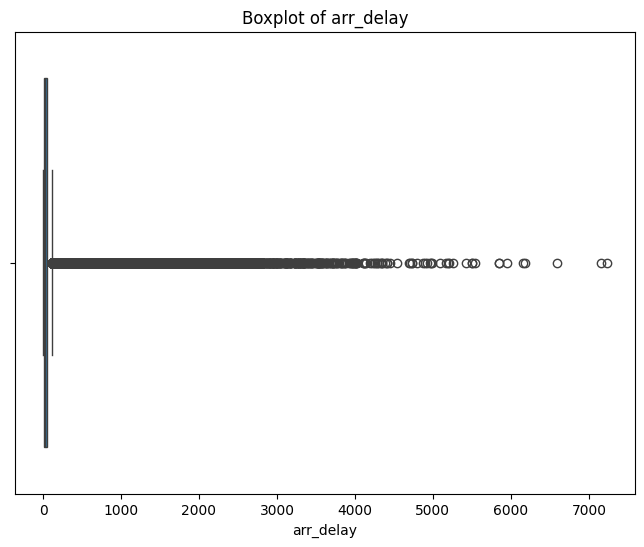

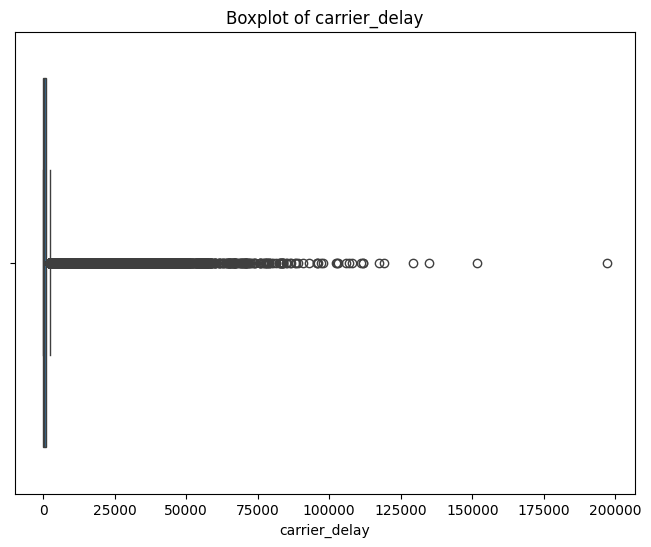

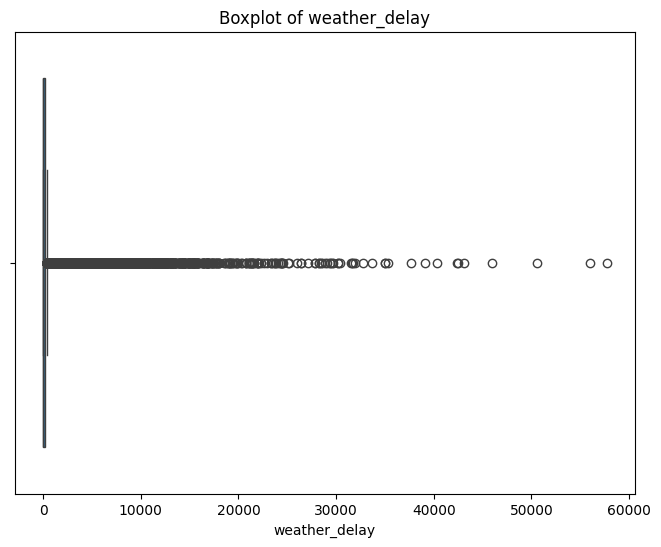

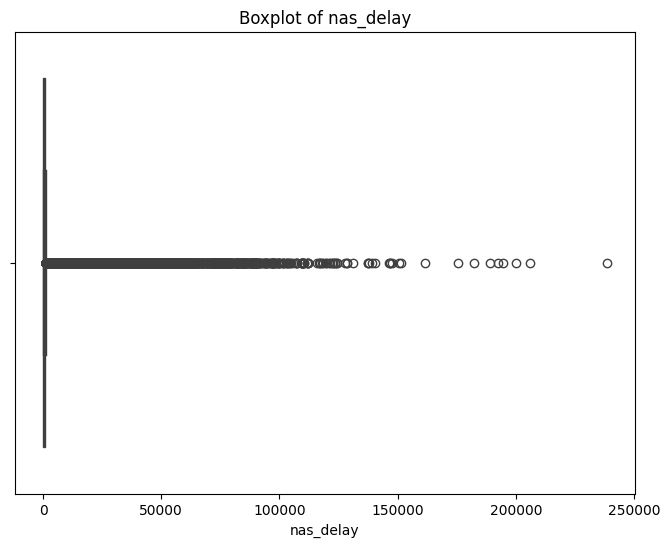

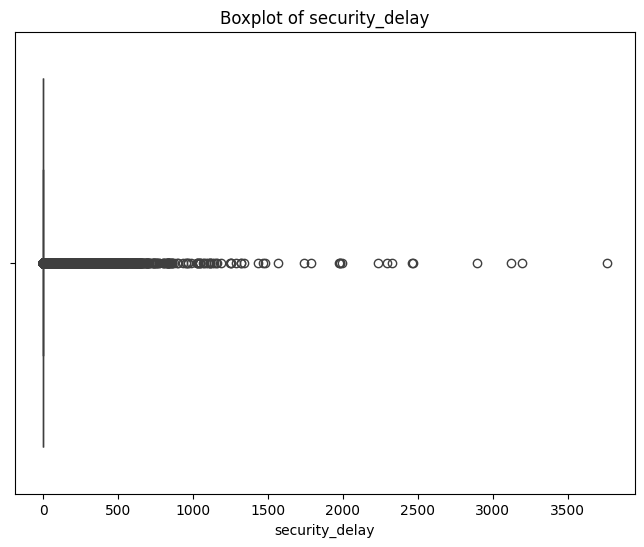

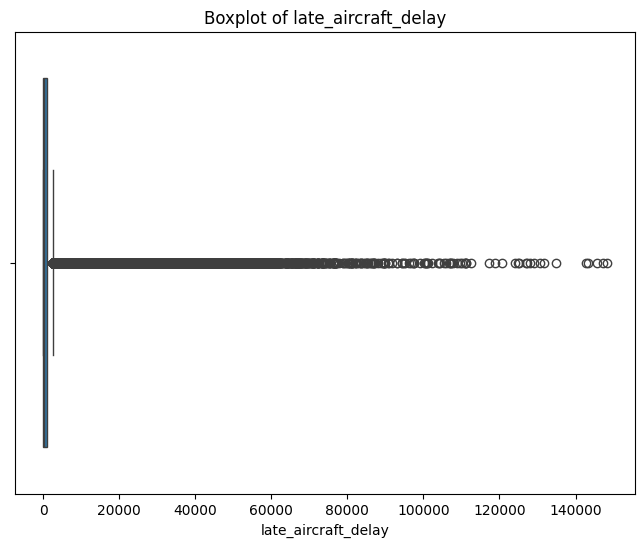

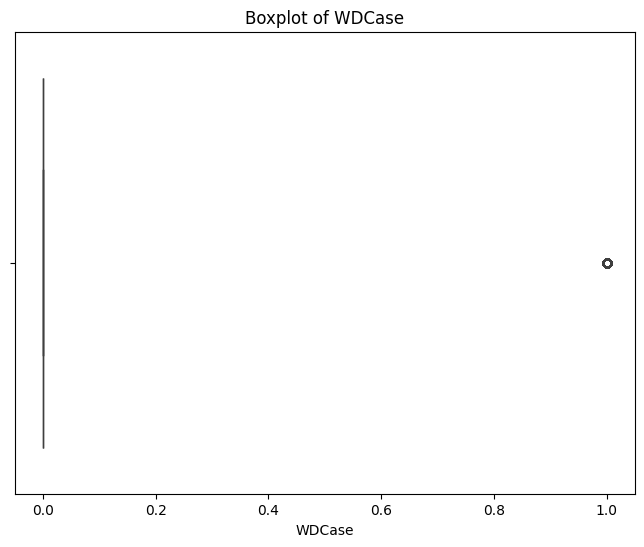

In [27]:
for col in data.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Dealing with outiers

In [28]:
# Function to detect outliers in a column
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


# Detect outliers in each numerical column and store results
outliers_info = {}

for col in data.select_dtypes(include="number").columns:
    outliers = detect_outliers(data, col)
    if not outliers.empty:
        outliers_info[col] = len(outliers)
        print(f"Column '{col}' has {len(outliers)} outliers.")

# Summarize results
if outliers_info:
    print("\nColumns with detected outliers:")
    for col, count in outliers_info.items():
        print(f"{col}: {count} outliers")
else:
    print("No outliers detected in the numerical columns.")

Column 'arr_flights' has 35831 outliers.
Column 'arr_del15' has 35104 outliers.
Column 'carrier_ct' has 31699 outliers.
Column 'weather_ct' has 36014 outliers.
Column 'nas_ct' has 37379 outliers.
Column 'security_ct' has 42004 outliers.
Column 'late_aircraft_ct' has 36952 outliers.
Column 'arr_cancelled' has 37917 outliers.
Column 'arr_diverted' has 22260 outliers.
Column 'arr_delay' has 35431 outliers.
Column 'carrier_delay' has 32050 outliers.
Column 'weather_delay' has 38766 outliers.
Column 'nas_delay' has 38864 outliers.
Column 'security_delay' has 42012 outliers.
Column 'late_aircraft_delay' has 36977 outliers.
Column 'WDCase' has 63649 outliers.

Columns with detected outliers:
arr_flights: 35831 outliers
arr_del15: 35104 outliers
carrier_ct: 31699 outliers
weather_ct: 36014 outliers
nas_ct: 37379 outliers
security_ct: 42004 outliers
late_aircraft_ct: 36952 outliers
arr_cancelled: 37917 outliers
arr_diverted: 22260 outliers
arr_delay: 35431 outliers
carrier_delay: 32050 outliers

In [29]:
import pandas as pd

def remove_outliers(df, column):
    """
    Remove outliers from a specified column of a DataFrame using the IQR method.

    Args:
        df (pd.DataFrame): The DataFrame to process.
        column (str): The column from which to remove outliers.

    Returns:
        pd.DataFrame: The DataFrame with outliers removed for the specified column.
    """
    try:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    except Exception as e:
        print(f"Error processing column {column}: {e}")
    return df

# Identify all numeric columns in the DataFrame
numeric_columns = data.select_dtypes(include=['number']).columns

# Loop over each numeric column and remove outliers
for col in numeric_columns:
    data = remove_outliers(data, col)

print("Outliers removed, new data shape:", data.shape)


Outliers removed, new data shape: (106986, 18)


In [30]:
def drop_high_frequency_columns(df, threshold=0.97, exclude_columns=None):
    """
    Drop columns from a DataFrame where any value exceeds a given frequency threshold.

    Args:
        df (pd.DataFrame): The DataFrame to process.
        threshold (float): The frequency threshold above which a column will be dropped.
        exclude_columns (list): A list of column names to exclude from processing.

    Returns:
        pd.DataFrame: The DataFrame with high-frequency columns removed, except for excluded columns.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Skip columns in the exclude list
        if col in exclude_columns:
            continue
        
        # Calculate the value counts normalized (percentage)
        value_counts = df[col].value_counts(normalize=True)
        
        # Check if any value exceeds the threshold
        if value_counts.max() > threshold:
            # Drop the column if the condition is met
            df.drop(col, axis=1, inplace=True)
    
    return df

# List of columns to exclude from dropping
exclude_columns = ["WDCase"]

# Drop high-frequency columns except those in exclude_columns
data = drop_high_frequency_columns(data, threshold=0.97, exclude_columns=exclude_columns)

data


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,late_aircraft_ct,arr_cancelled,arr_delay,carrier_delay,weather_delay,nas_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,1.00,0.0,4.250000,222.0,0.0,4.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,6.09,0.0,14.733333,351.0,0.0,81.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.88,1.0,2.300000,4.0,0.0,106.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,1.64,0.0,15.783333,585.0,35.0,125.0,202.0,0
4,2022,5,181.0,19.0,13.84,0.00,3.07,2.09,0.0,13.466667,662.0,0.0,87.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317990,2003,6,30.0,7.0,5.31,0.00,1.69,0.00,0.0,9.766667,557.0,0.0,29.0,0.0,0
317992,2003,6,60.0,17.0,5.69,0.00,7.06,4.25,0.0,8.716667,133.0,0.0,149.0,241.0,0
318002,2003,6,56.0,0.0,0.00,0.00,0.00,0.00,1.0,0.000000,0.0,0.0,0.0,0.0,0
318004,2003,6,120.0,26.0,9.13,0.00,12.04,4.82,0.0,14.433333,404.0,0.0,331.0,131.0,0


In [31]:
X = data.drop(['WDCase'],axis = 1)
y =data['WDCase']


In [32]:

X


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,late_aircraft_ct,arr_cancelled,arr_delay,carrier_delay,weather_delay,nas_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,1.00,0.0,4.250000,222.0,0.0,4.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,6.09,0.0,14.733333,351.0,0.0,81.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.88,1.0,2.300000,4.0,0.0,106.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,1.64,0.0,15.783333,585.0,35.0,125.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,2.09,0.0,13.466667,662.0,0.0,87.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317990,2003,6,30.0,7.0,5.31,0.00,1.69,0.00,0.0,9.766667,557.0,0.0,29.0,0.0
317992,2003,6,60.0,17.0,5.69,0.00,7.06,4.25,0.0,8.716667,133.0,0.0,149.0,241.0
318002,2003,6,56.0,0.0,0.00,0.00,0.00,0.00,1.0,0.000000,0.0,0.0,0.0,0.0
318004,2003,6,120.0,26.0,9.13,0.00,12.04,4.82,0.0,14.433333,404.0,0.0,331.0,131.0


In [33]:
y

0         0
1         0
2         0
3         0
4         0
         ..
317990    0
317992    0
318002    0
318004    0
318015    0
Name: WDCase, Length: 106986, dtype: int64

Normalizing the data using tenserflow 

In [34]:
# Convert all columns of X_train to a TensorFlow tensor
X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)

# Define and adapt the normalization layer on X_train
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_tensor)

# Normalize the training data
normalized_X = normalizer(X_tensor)

# Convert normalized Tensor back to DataFrame
normalized_X_df = pd.DataFrame(normalized_X.numpy(), columns=X.columns)

print("Normalized Training DataFrame:")
normalized_X_df

Normalized Training DataFrame:


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,late_aircraft_ct,arr_cancelled,arr_delay,carrier_delay,weather_delay,nas_delay,late_aircraft_delay
0,1.551804,-0.480055,1.218037,-0.235108,0.617567,-0.464547,-0.894064,-0.517563,-0.540486,-0.443974,0.192047,-0.469811,-0.876865,-0.671685
1,1.551804,-0.480055,0.452840,1.002066,1.010169,-0.464547,0.045065,1.348675,-0.540486,1.381412,0.876635,-0.469811,0.012862,2.013277
2,1.551804,-0.480055,-0.771476,-0.922427,-0.980295,-0.464547,-0.535762,-0.561560,0.393613,-0.783513,-0.964854,-0.469811,0.301734,-0.678033
3,1.551804,-0.480055,0.401827,0.727139,0.977223,1.522236,0.727726,-0.282908,-0.540486,1.564241,2.118446,1.731412,0.521277,0.426420
4,1.551804,-0.480055,1.983234,1.414458,2.783741,-0.464547,0.244960,-0.117917,-0.540486,1.160856,2.527076,-0.469811,0.082191,-0.481262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106981,-1.827776,-0.191993,-0.584427,-0.235108,0.441857,-0.464547,-0.275521,-0.884211,-0.540486,0.516603,1.969853,-0.469811,-0.587993,-0.855761
106982,-1.827776,-0.191993,-0.074296,1.139530,0.546185,-0.464547,1.749831,0.674043,-0.540486,0.333774,-0.280266,-0.469811,0.798595,0.673970
106983,-1.827776,-0.191993,-0.142314,-1.197355,-1.015987,-0.464547,-0.912922,-0.884211,0.393613,-1.183995,-0.986081,-0.469811,-0.923085,-0.855761
106984,-1.827776,-0.191993,0.945967,2.376704,1.490626,-0.464547,3.628090,0.883032,-0.540486,1.329175,1.157900,-0.469811,2.901586,-0.024248


Training the model

In [35]:
# Split the data into training and testing sets (replace with your actual split)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(f"X Train shape : {X_train.shape}")
print(f"X Test shape : {X_test.shape}")
print(f"y Train shape : {y_train.shape}")
print(f"y Test shape : {y_test.shape}")

X Train shape : (80239, 14)
X Test shape : (26747, 14)
y Train shape : (80239,)
y Test shape : (26747,)


In [36]:
# Adding the layers
KerasModel = keras.models.Sequential([
            # keras.layers.Input(shape=(17)),
            keras.layers.Dense(8,  activation = 'tanh'),
            # keras.layers.Dropout(0.1),
            keras.layers.Dense(128, activation = 'sigmoid'),
            # keras.layers.Dropout(0.3),
            keras.layers.Dense(64, activation = 'tanh'),
            keras.layers.Dense(32, activation = 'tanh'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(1, activation = 'sigmoid')
            ])

In [37]:
#Creating the optimizer
MyOptimizer = tf.keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    name="AdamW"
)

In [38]:
KerasModel.compile(optimizer =MyOptimizer,loss='binary_crossentropy',metrics=['accuracy']) # matrix

In [39]:
history = KerasModel.fit(X_train,y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5517 - loss: 0.6439 - val_accuracy: 1.0000 - val_loss: 0.0468
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0368 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0128 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss:

In [40]:
print(KerasModel.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,925 (136.43 KB)

 Trainable params: 11,641 (45.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,284 (90.96 KB)

None


In [41]:
y_pred = KerasModel.predict(X_test)

836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step


In [42]:
print('Prediction Shape is {}'.format(y_pred.shape))


Prediction Shape is (26747, 1)


In [43]:
print('Prediction items are {}'.format(y_pred[:5]))


Prediction items are [[0.04439937]
 [0.04933892]
 [0.04439937]
 [0.04933892]
 [0.04439937]]


In [44]:
y_test[:5]

205307    0
264283    0
105557    0
112550    0
120061    0
Name: WDCase, dtype: int64

In [45]:

ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))


836/836 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 1.0000 - loss: 0.0468
Model Loss is 0.04683071747422218
Model Accuracy is 1.0


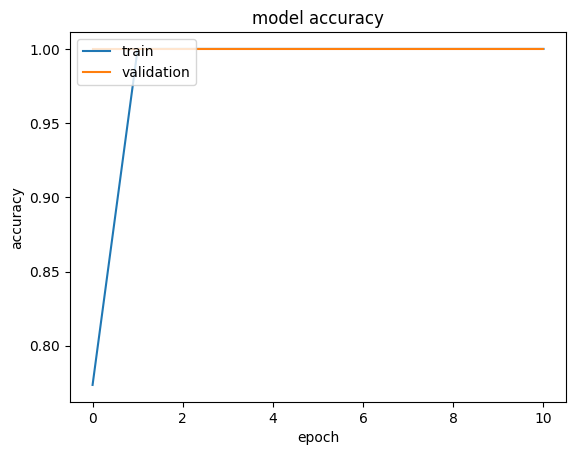

In [46]:
#ploting the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


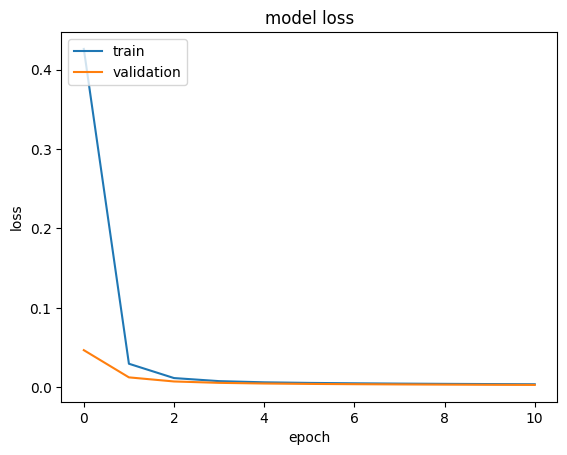

In [47]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [48]:

len(y_test), len(y_pred)


(26747, 26747)

In [49]:

y_pred


array([[0.04439937],
       [0.04933892],
       [0.04439937],
       ...,
       [0.04933892],
       [0.04443232],
       [0.04933892]], dtype=float32)

In [50]:
y_pred = [np.round(i[0]) for i in y_pred]
y_pred

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [51]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[26747]]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [52]:
#classification report 
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )


Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26747

    accuracy                           1.00     26747
   macro avg       1.00      1.00      1.00     26747
weighted avg       1.00      1.00      1.00     26747

